# Prédictions diabète

## Présentation du fichier

Cet ensemble de données provient de l’Institut national du diabète et du digestion et des reins
Maladies. L’objectif de l’ensemble de données est de prédire de manière diagnostique si un patient est diabétique,
basé sur certaines mesures diagnostiques incluses dans l’ensemble de données. Plusieurs contraintes ont été placées
sur la sélection de ces instances à partir d’une base de données plus grande. En particulier, tous les patients ici sont des femmes
être âgé d’au moins 21 ans d’origine indienne. On peut trouver plusieurs variables, certaines d’entre elles sont indépendantes
(plusieurs variables prédictives médicales) et une seule variable dépendante de la cible (résultat).

## Sommaire

### Importation bibliothèque


In [1]:
# Bibliothèque standard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Séparation du jeu de données
from sklearn.model_selection import train_test_split

# Standardisation des données
from sklearn.preprocessing import StandardScaler

# Régression Logistique
from sklearn.linear_model import LogisticRegression


# RandomForest
from sklearn.ensemble import RandomForestClassifier


# Mesures de performances
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

# Optimisation du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [2]:
# Importation fichier

data = pd.read_csv('diabetes.csv')

In [3]:
# Définition titre graphique

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

### Exploration du fichier

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data.shape)
print(data.dtypes)

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Text(0.5, 1.0, 'Représentation des valeurs manquantes')

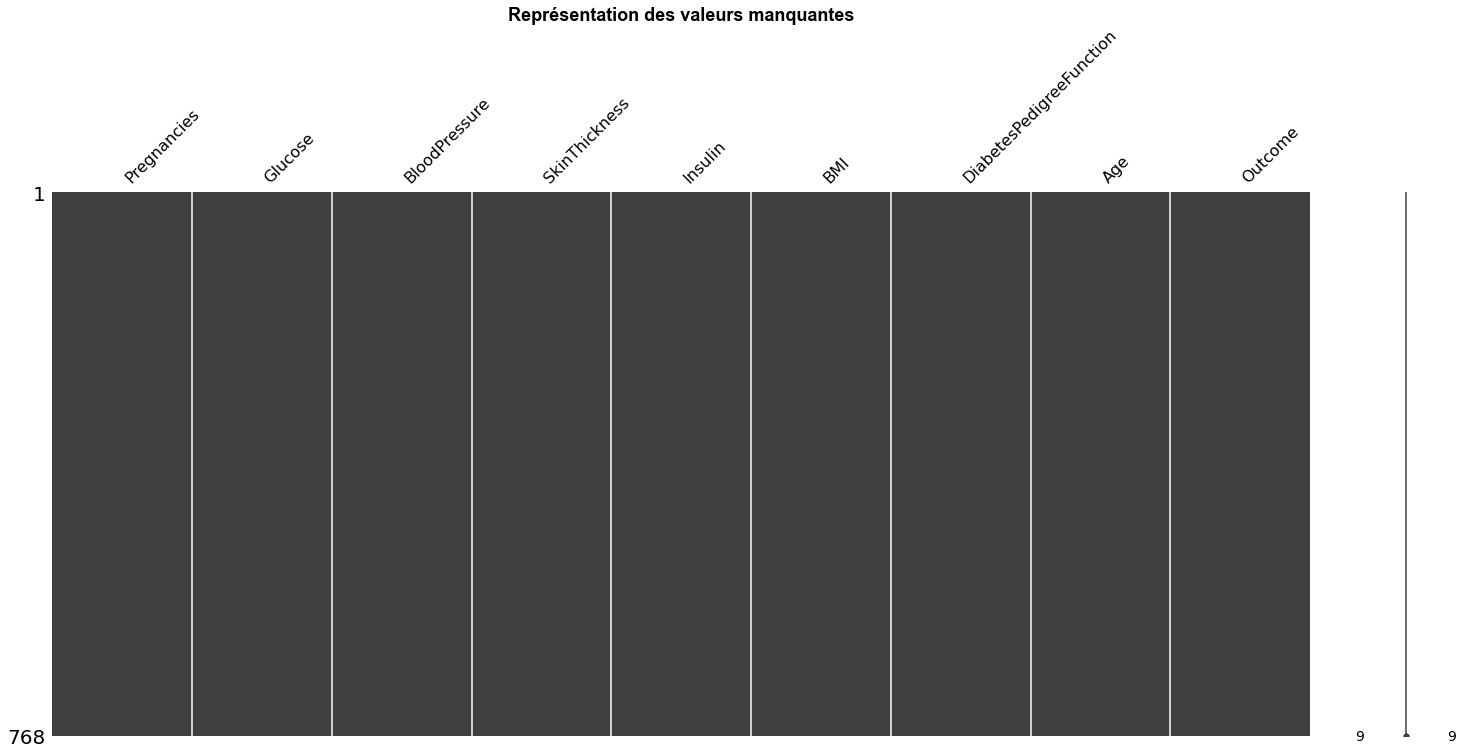

In [6]:
msno.matrix(data)
plt.title('Représentation des valeurs manquantes',
         fontdict = title)

Notre fichier ne présente aucune valeur manquante. Nous allons démarrer notre analyse des données.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


C:\Users\gregm\AppData\Local\Temp/ipykernel_18644/3104016293.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation2, dtype=np.bool)


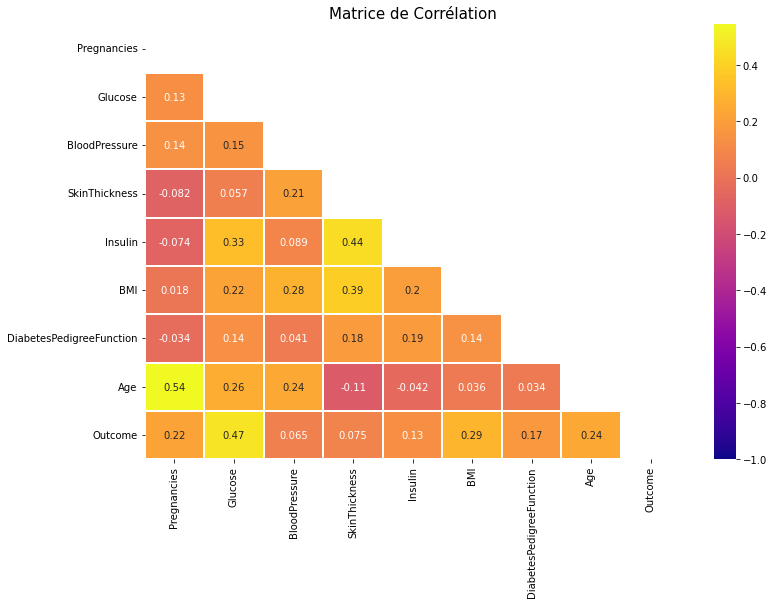

In [8]:
# Graphique de Pearson

correlation2 = data.corr()

mask = np.zeros_like(correlation2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

plt.figure (figsize = (12,8))
ax = sns.heatmap(correlation2, mask=mask, vmin=-1, cmap='plasma', linewidth = 0.2, annot = True)
plt.title('Matrice de Corrélation', size = 15)
plt.show()

Ce graphique nous indique une forte corrélation entre l'âge et le nombre de grossesses des patients, nous allons analyser ces deux variables.
Le glucose semble également avoir un impact sur les résultats du diabète. Les autres variables permettent d'obtenir une meilleure précision des données.

In [9]:
# Analyse data Outcome

data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

(0.0, 1.0)

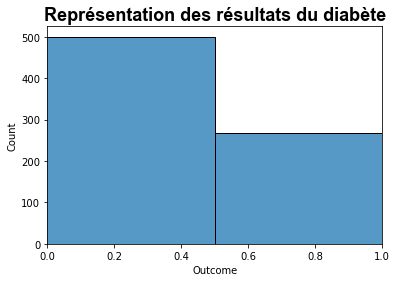

In [10]:
# Analyse graphique 

sns.histplot(x = 'Outcome', data = data, discrete = True)
plt.title('Représentation des résultats du diabète',
         fontdict = title)
plt.xlim(0, 1)

Nous pouvons constater que la majorité des données présentent des résultats négatifs. Nous allons ici nous intéresser à nos divers variables afin de constater l'impact des variables sur les résultats.

17
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


Text(0.5, 1.0, "Représentation de l'impact de la grossesse sur le diabète")

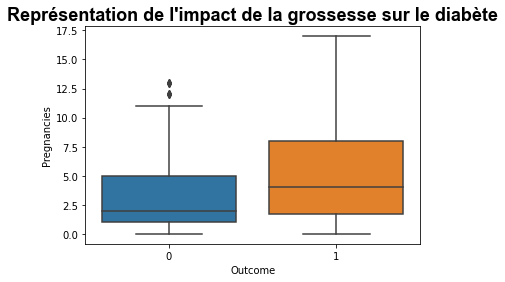

In [11]:
# Analyse variable Pregnancies

print(data['Pregnancies'].nunique())
print(data['Pregnancies'].value_counts())

sns.boxplot(x = 'Outcome',y= 'Pregnancies', data = data)
plt.title("Représentation de l'impact de la grossesse sur le diabète",
         fontdict = title)

Notre variable présente les femmes enceintes en fonction du nombre de grossesses.
Quand nous analysons nos variables, nous pourrions avoir tendance à indiquer que le nombre de semaines de grossesse peut impacter le résultat.

136
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


Text(0.5, 1.0, "Représentation de l'impact du glucose sur le diabète")

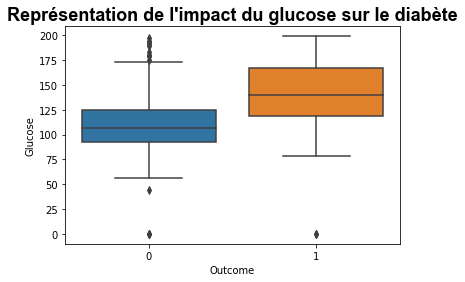

In [12]:
# Analyse de la variable Glucose

print(data['Glucose'].nunique())
print(data['Glucose'].value_counts())

sns.boxplot(x = 'Outcome',y= 'Glucose', data = data)
plt.title("Représentation de l'impact du glucose sur le diabète",
         fontdict = title)

52
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

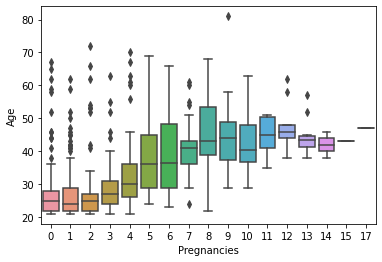

In [13]:
# Analyse de la variable Age

print(data['Age'].nunique())
print(data['Age'].value_counts())

plt.figure(figsize = (8,8))
sns.boxplot(x = 'Pregnancies', y = 'Age', data = data)
plt.title("Représentation du nombre de grossesses en fonction de l'âge";
         fontdict = title)

Notre principale constat est que nous constatons un impact du nombre de grossesses en fonction de l'âge.

Text(0.5, 1.0, "Représentation du niveau de glucose en fonction de l'âge et selon la présence du diabète")

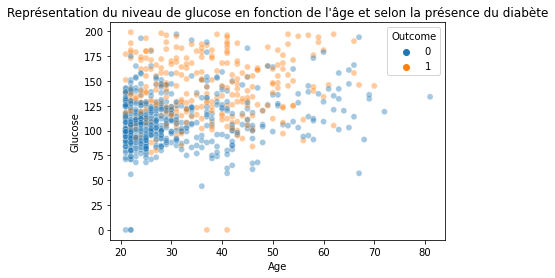

In [14]:
# Représentation du glucose selon l'âge et en fonction des résultats du diabète

sns.scatterplot(x = 'Age', y = 'Glucose', hue = 'Outcome', data = data,
               alpha = 0.4)
plt.title("Représentation du niveau de glucose en fonction de l'âge et selon la présence du diabète")

## Modélisation

Dans le cadre de notre projet, nous allons procéder à une modélisation des données.

Notre problématique concerne une classification (la personne a t'elle le diabète?).

Nous allons procéder à une modélisation à travers 3 modèles :
- Régression Logistique,
- Arbre de décisions,
- Random Forest

In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
# Séparation du jeu de données

X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

display('Données entrainements : ',X_train.shape, X_test.shape)
display('Données de test',y_train.shape, y_test.shape)

'Données entrainements : '

(576, 8)

(192, 8)

'Données de test'

(576,)

(192,)

In [18]:
# 2. Utilisation du StandardScaler()

scaler = StandardScaler()

# Entrainement du modèle
#scaler.fit(X_train)

# Intégration à nos données
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### 1. Régression logistique

In [19]:
# Création du modèle
model1 = LogisticRegression()

# Entrainement du modèle
model1.fit(X_train, y_train)

# Analyse de nos prédictions
prediction1 = model1.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A1 = model1.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A1)


R1 = model1.score(X_test, y_test)
print("Le score de test est de : ",R1)

Le score d'apprentissage est de :  0.7934027777777778
Le score de test est de :  0.7395833333333334


In [20]:
# MAE (Mean Absolute Error)

MAE1 = mean_absolute_error(y_test, prediction1)
      
# MSE (Mean Squarred Error)

MSE1 = np.sqrt(mean_squared_error(y_test, prediction1))

#### Random Forest

In [21]:
# Création du modèle
model2 = RandomForestClassifier()

# Entrainement du modèle
model2.fit(X_train, y_train)

# Analyse de nos prédictions
prediction2 = model2.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A2 = model2.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A2)


R2 = model2.score(X_test, y_test)
print("Le score de test est de : ",R2)

Le score d'apprentissage est de :  1.0
Le score de test est de :  0.703125


In [22]:
# MAE (Mean Absolute Error)

MAE2 = mean_absolute_error(y_test, prediction2)
      
# MSE (Mean Squarred Error)

MSE2 = mean_squared_error(y_test, prediction2)

In [23]:
A = [A1, A2]
R = [R1, R2]
MAE = [MAE1, MAE2]
MSE = [MSE1, MSE2]

indice = ['Régression logistique','Random Forest']


data_analyse = pd.DataFrame ({'Score Apprentissage': A,'Score Test' : R, 'MAE':MAE, 'MSE':MSE}, index = indice)
data_analyse

,Score Apprentissage,Score Test,MAE,MSE
Régression logistique,0.793403,0.739583,0.260417,0.510310
Random Forest,1.000000,0.703125,0.296875,0.296875


## Optimisation des modèles

### 1. Régression logistique

##### A. Cross Validation

In [24]:
cross_val_score(LogisticRegression(), X_train, y_train, cv = 10).mean()

0.7812462189957653

In [25]:
C = [1,10,100,1000]
score_apprentissage, score_validation = validation_curve(model1, X_train, y_train,
                                                        param_name = 'C',
                                                        param_range = C, cv = 10)

In [26]:
score_validation.mean(axis = 1)

array([0.78124622, 0.78124622, 0.78124622, 0.78124622])

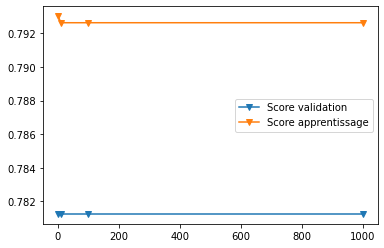

In [27]:
plt.plot(C, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(C, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

#### B. GridSearchCV

In [28]:
grid_param = {'C' : [1,10,100,1000],
             'random_state' : [100, 1000, 2000, 10000]}
              
grid_search_rl = GridSearchCV(LogisticRegression(), grid_param, cv = 5, verbose = 5)

In [29]:
# ici, on entraine la fonction
grid_search_rl.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .............C=1, random_state=100;, score=0.819 total time=   0.0s
[CV 2/5] END .............C=1, random_state=100;, score=0.739 total time=   0.0s
[CV 3/5] END .............C=1, random_state=100;, score=0.809 total time=   0.0s
[CV 4/5] END .............C=1, random_state=100;, score=0.817 total time=   0.0s
[CV 5/5] END .............C=1, random_state=100;, score=0.783 total time=   0.0s
[CV 1/5] END ............C=1, random_state=1000;, score=0.819 total time=   0.0s
[CV 2/5] END ............C=1, random_state=1000;, score=0.739 total time=   0.0s
[CV 3/5] END ............C=1, random_state=1000;, score=0.809 total time=   0.0s
[CV 4/5] END ............C=1, random_state=1000;, score=0.817 total time=   0.0s
[CV 5/5] END ............C=1, random_state=1000;, score=0.783 total time=   0.0s
[CV 1/5] END ............C=1, random_state=2000;, score=0.819 total time=   0.0s
[CV 2/5] END ............C=1, random_state=2000;

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000],
                         'random_state': [100, 1000, 2000, 10000]},
             verbose=5)

In [30]:
# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid_search_rl.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search_rl.best_params_)

Le meilleur score avec les hyperparamètres est de :  0.7933583208395801
Les meilleurs hyperparamètres sont :  {'C': 1, 'random_state': 100}


### 2. Random Forest

#### A. Cross Validation

In [31]:
cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 10).mean()

0.7777979431336963

In [32]:

n_estimators = [100, 300, 500, 700, 1000, 1500, 2000]
score_apprentissage, score_validation = validation_curve(model2, X_train, y_train,
                                                        param_name = 'n_estimators',
                                                        param_range = n_estimators, cv = 10)

In [33]:
score_validation.mean(axis = 1)

array([0.77259528, 0.78303085, 0.77952208, 0.78472474, 0.77610405,
       0.77779794, 0.77952208])

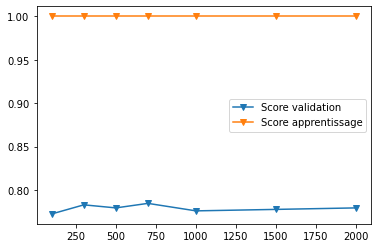

In [34]:
plt.plot(n_estimators, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(n_estimators, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

In [35]:

max_depth = [1, 100, 1000, 10000, 100000, 1000000]
score_apprentissage, score_validation = validation_curve(model2, X_train, y_train,
                                                        param_name = 'max_depth',
                                                        param_range = max_depth, cv = 10)

In [36]:
score_validation.mean(axis = 1)

array([0.67888687, 0.78133696, 0.78124622, 0.77773745, 0.78127647,
       0.77961283])

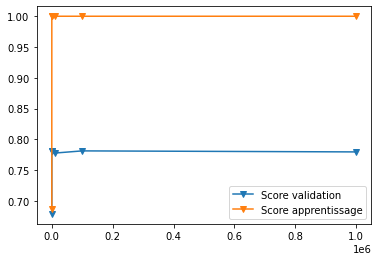

In [37]:
plt.plot(max_depth, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(max_depth, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

#### B. GridSearchCV

In [38]:
grid_param = {'n_estimators' : [50, 100, 600, 650, 700],
              'max_depth' : [100000, 300000, 500000, 700000, 1000000],
             'criterion' : ['gini', 'entropy', 'log_loss'],
             'max_features' : ['sqrt', 'log2', None]}
              
grid_search_rf = GridSearchCV(RandomForestClassifier(), grid_param, cv = 5, verbose = 5)

In [39]:
# ici, on entraine la fonction
grid_search_rf.fit(X_train, y_train)

# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid_search_rf.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search_rf.best_params_)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV 1/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=50;, score=0.810 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=50;, score=0.748 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=50;, score=0.783 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=50;, score=0.783 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=50;, score=0.765 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=100;, score=0.810 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=100;, score=0.739 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=100000, max_features=sqrt, n_estimators=100;, score=0.774 total time=   0.3s
[CV 4/5] END 

In [41]:
# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid_search_rf.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search_rf.best_params_)

Le meilleur score avec les hyperparamètres est de :  0.8020539730134933
Les meilleurs hyperparamètres sont :  {'criterion': 'entropy', 'max_depth': 100000, 'max_features': 'sqrt', 'n_estimators': 700}


## Conclusion

Nous pouvons conclure que notre volonté de créer un modèle nous permettant de répondre à une détection des personnes ayant le diabète est cohérent.

En effet, les données obtenus en amont nous ont permis d'effectuer une analyse sur les causes de cette pathologie.

Après avoir procédé à une analyse de nos différentes variables, nous avons procédé à la phase de modélisation.

Nos données présentent une problématique concernant la classification, nous allons procéder à une sélection des différents modèles existants et étudier la Régression logistique et le Random Forest.

Après entrainement de nos modèles, nous arrivons à des scores entre 0.70 et 0.73, ce qui reste tout à fait cohérent vu la problématique.

Après optimisation de nos modèles, nous remarquons une amélioration importante notamment pour le Random Forest. Ce dernier sera le modèle sélectionné.